# Importing libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Extracting the data

In [2]:
df = pd.read_csv(r'C:\Users\rtfol\Desktop\לימודים\שנה ב\סמסטר ב\מדע נתונים - תיאוריה ומעשה\vehicles.csv')
print(df.shape)
df.head()

(458213, 26)


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


# Checking the info of the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [4]:
null_columns = df.columns[df.isna().mean() > 0.3]
df = df.drop(null_columns, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   fuel          454976 non-null  object 
 10  odometer      402910 non-null  float64
 11  title_status  455636 non-null  object 
 12  transmission  455771 non-null  object 
 13  drive         324025 non-null  object 
 14  type          345475 non-null  object 
 15  image_url     458185 non-null  object 
 16  description   458143 non-null  object 
 17  state         458213 non-null  object 
 18  lat 

In [6]:
unneeded_columns = ['Unnamed: 0', 'id', 'url', 'region_url', 'image_url', 'description', 'posting_date']
df = df.drop(unneeded_columns, axis=1)

In [7]:
df

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,drive,type,state,lat,long
0,auburn,35990,2010.0,chevrolet,corvette grand sport,gas,32742.0,clean,other,rwd,other,al,32.590000,-85.480000
1,auburn,7500,2014.0,hyundai,sonata,gas,93600.0,clean,automatic,fwd,sedan,al,32.547500,-85.468200
2,auburn,4900,2006.0,bmw,x3 3.0i,gas,87046.0,clean,automatic,NaN,SUV,al,32.616807,-85.464149
3,auburn,2000,1974.0,chevrolet,c-10,gas,190000.0,clean,automatic,rwd,pickup,al,32.861600,-85.216100
4,auburn,19500,2005.0,ford,f350 lariat,diesel,116000.0,lien,automatic,4wd,pickup,al,32.547500,-85.468200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,wausau,14995,2014.0,cadillac,srx,gas,83790.0,clean,automatic,4wd,SUV,wi,44.408867,-89.881210
458209,wausau,17895,2018.0,hyundai,tucson,gas,31888.0,clean,automatic,4wd,SUV,wi,44.408867,-89.882240
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,gas,53000.0,clean,automatic,4wd,coupe,wy,44.784900,-106.964800
458211,wyoming,1300,2008.0,jeep,grand cherokee,gas,164000.0,clean,automatic,4wd,SUV,wy,44.773500,-106.939600


In [8]:
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object'}

{'region': 405,
 'manufacturer': 44,
 'model': 31521,
 'fuel': 6,
 'title_status': 7,
 'transmission': 4,
 'drive': 4,
 'type': 14,
 'state': 51}

In [9]:
df = df.drop('model', axis=1)

# Looking for outliers

In [10]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,price,year,odometer,lat,long
count,458213.000000,457163.000000,402910.000000,450765.000000,450765.000000
mean,40420.930696,2010.746067,101669.756941,38.531925,-94.375824
std,8194598.603665,8.868136,3228622.544962,5.857378,18.076225
min,0.000000,1900.000000,0.000000,-82.607549,-164.091797
25%,4900.000000,2008.000000,40877.000000,34.600000,-110.890427
50%,10995.000000,2013.000000,87641.000000,39.244500,-88.314889
75%,21495.000000,2016.000000,134000.000000,42.484503,-81.015022
max,3615215112.000000,2021.000000,2043755555.000000,82.049255,150.898969


There are outliers in price, year and odometer columns

In [11]:
p_low = df['price'].quantile(0.1)
p_high = df['price'].quantile(0.9995)
df = df[(df['price'] < p_high) & (df['price'] > p_low)]

In [12]:
y_low = df['year'].quantile(0.026)
y_high = df['year'].quantile(1)
df = df[(df['year'] <= y_high) & (df['year'] > y_low)]

In [13]:
o_low = df['odometer'].quantile(0)
o_high = df['odometer'].quantile(0.99)
df = df[(df['odometer'] < o_high) & (df['odometer'] >= o_low)]

In [14]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,price,year,odometer,lat,long
count,354740.000000,354740.000000,354740.000000,352164.000000,352164.000000
mean,16935.890582,2011.858141,93614.059528,38.707977,-94.158520
std,13259.849201,5.513977,59526.883666,5.858462,17.984949
min,652.000000,1990.000000,0.000000,-81.702792,-164.091797
25%,6985.000000,2008.000000,42324.000000,34.917585,-108.572700
50%,13500.000000,2013.000000,90173.000000,39.491150,-87.980000
75%,23990.000000,2016.000000,135899.250000,42.587700,-80.989166
max,155995.000000,2021.000000,270278.000000,76.781734,94.163200


# Correlation Matrix

<AxesSubplot:>

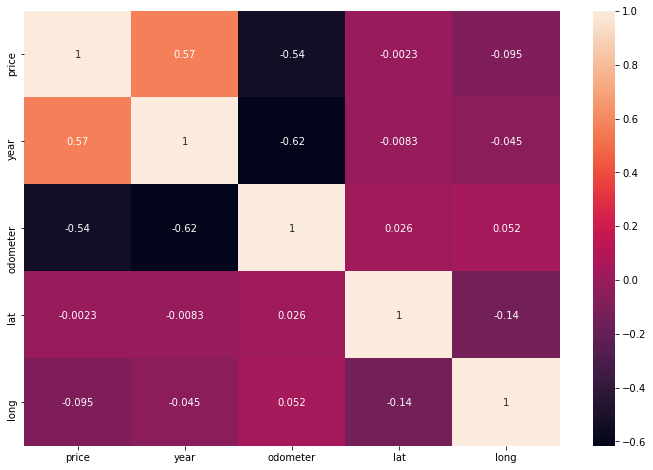

In [15]:
corrmatrix = df.corr()
plt.figure(figsize=(12,8))
sn.heatmap(corrmatrix, xticklabels=corrmatrix.columns, yticklabels=corrmatrix.columns, annot=True)

# Setting unique values

In [16]:
def onehot_encode(data, columns, prefixes):
    data = data.copy()
    for col, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(data[col], prefix=prefix)
        data = pd.concat([data, dummies], axis=1)
        data = data.drop(col, axis=1)
    return data

In [17]:
data = df

In [18]:
df = onehot_encode(df,['region', 'manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'state'],
                   ['reg', 'manufac', 'fuel', 'title', 'trans', 'drive', 'type', 'state'])

In [19]:
df

,price,year,odometer,lat,long,reg_SF bay area,reg_abilene,reg_akron / canton,reg_albany,reg_albuquerque,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,35990,2010.0,32742.0,32.590000,-85.480000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7500,2014.0,93600.0,32.547500,-85.468200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4900,2006.0,87046.0,32.616807,-85.464149,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19500,2005.0,116000.0,32.547500,-85.468200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29590,2016.0,33290.0,32.590000,-85.480000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,14995,2014.0,83790.0,44.408867,-89.881210,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
458209,17895,2018.0,31888.0,44.408867,-89.882240,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
458210,17900,2014.0,53000.0,44.784900,-106.964800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
458211,1300,2008.0,164000.0,44.773500,-106.939600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
data

,region,price,year,manufacturer,fuel,odometer,title_status,transmission,drive,type,state,lat,long
0,auburn,35990,2010.0,chevrolet,gas,32742.0,clean,other,rwd,other,al,32.590000,-85.480000
1,auburn,7500,2014.0,hyundai,gas,93600.0,clean,automatic,fwd,sedan,al,32.547500,-85.468200
2,auburn,4900,2006.0,bmw,gas,87046.0,clean,automatic,NaN,SUV,al,32.616807,-85.464149
4,auburn,19500,2005.0,ford,diesel,116000.0,lien,automatic,4wd,pickup,al,32.547500,-85.468200
5,auburn,29590,2016.0,toyota,gas,33290.0,clean,other,NaN,pickup,al,32.590000,-85.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,wausau,14995,2014.0,cadillac,gas,83790.0,clean,automatic,4wd,SUV,wi,44.408867,-89.881210
458209,wausau,17895,2018.0,hyundai,gas,31888.0,clean,automatic,4wd,SUV,wi,44.408867,-89.882240
458210,wyoming,17900,2014.0,cadillac,gas,53000.0,clean,automatic,4wd,coupe,wy,44.784900,-106.964800
458211,wyoming,1300,2008.0,jeep,gas,164000.0,clean,automatic,4wd,SUV,wy,44.773500,-106.939600


# Checking NaN cells by % for each column left

In [21]:
df.isnull().sum().sort_values()*100/len(df)

price                 0.000000
reg_texarkana         0.000000
reg_terre haute       0.000000
reg_tampa bay area    0.000000
reg_tallahassee       0.000000
                        ...   
reg_la crosse         0.000000
reg_kenosha-racine    0.000000
state_wy              0.000000
long                  0.726166
lat                   0.726166
Length: 533, dtype: float64

In [22]:
data.isnull().sum().sort_values()*100/len(data)

region           0.000000
price            0.000000
year             0.000000
odometer         0.000000
state            0.000000
title_status     0.407622
transmission     0.432147
fuel             0.654282
lat              0.726166
long             0.726166
manufacturer     2.626431
type            18.770085
drive           24.540790
dtype: float64

# Getting rid of NaN values

In [23]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

In [24]:
data = data.select_dtypes(include=[np.number])
data = data.dropna()
data = data.reset_index(drop=True)

In [25]:
car_price = data['price']
data = (data - data.min())/(data.max() - data.min())
data['price'] = car_price
data.head()

,price,year,odometer,lat,long
0,35990,0.645161,0.121142,0.721161,0.304396
1,7500,0.774194,0.346310,0.720892,0.304442
2,4900,0.516129,0.322061,0.721330,0.304457
3,19500,0.483871,0.429188,0.720892,0.304442
4,29590,0.838710,0.123169,0.721161,0.304396


In [26]:
df.isna().sum().sum()

0

In [27]:
data.isna().sum().sum()

0

# Training and Prediction

In [28]:
yl = df.loc[:, 'price']
xl = df.drop('price',axis=1)

scaler = StandardScaler()
xl = scaler.fit_transform(xl)

In [29]:
xl_train, xl_test, yl_train, yl_test = train_test_split(xl,yl, train_size=0.8, random_state=34)

# Linear Regression

In [30]:
model_lr = LinearRegression()
model_lr.fit(xl_train, yl_train)
y_pred_lr = model_lr.predict(xl_test)
result_lr = model_lr.score(xl_test, yl_test)
loss_lr = np.sqrt(mean_squared_error(yl_test, y_pred_lr))
print('Accuracy: %.2f%%' % (result_lr*100))
print('MSE:', loss_lr)

Accuracy: 66.88%
MSE: 7616.590146249303


# Training and Prediction

In [31]:
yk = data.loc[:, 'price']
xk = data.drop('price',axis=1)

scaler = StandardScaler()
xk = scaler.fit_transform(xk)

In [32]:
xk_train, xk_test, yk_train, yk_test = train_test_split(xk,yk, train_size=0.85, random_state=34)

# KNN

In [39]:
model_knn = KNeighborsRegressor(n_neighbors=4)
model_knn.fit(xk_train, yk_train)
y_pred_knn = model_knn.predict(xk_test)
result_knn = model_knn.score(xk_test, yk_test)
loss_knn = np.sqrt(mean_squared_error(yk_test, y_pred_knn))
print('Accuracy: %.2f%%' % (result_knn*100))
print('MSE:', loss_knn)

Accuracy: 60.60%
MSE: 8351.71917323686
